In [1]:


from utility import *
from sampling import *
from pool import *

def runMe(sequence_length,num_rounds=3,scalar=10000,affinity_max=1e6):
    """
    Simulate a basic binding experiment.  
    """
    
    pipet = PipetteSampler()
    screen = BindingSampler()
    amplify = PhageAmplificationSampler()

    pool = Pool(sequence_length=sequence_length,alphabet=AMINO_ACIDS)
    pool.createUniformPool(100*scalar,affinity_max)

    print(0,pool.current_counts.size,sum(pool.current_counts))
    for i in range(num_rounds):
        pipet.runExperiment(pool,100*scalar)
        screen.runExperiment(pool,1*scalar)
        amplify.runExperiment(pool,100*scalar,checkpoint=True)

        print(i+1,pool.current_counts.size,sum(pool.current_counts))
    
    return pool




In [2]:
pool = runMe(9,num_rounds=3,scalar=10000,affinity_max=1e6)


0 1000000 1000000
1 10000 1000000
2 5716 1000000
3 3948 1000000


0
3
6
9


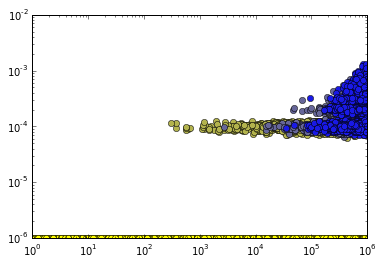

In [10]:

import matplotlib.pyplot as plt
%matplotlib inline

pool.round_affinities(0)

m = len(pool.checkpoints)
for i, x in enumerate(pool.checkpoints):
    if x == True:
        plt.plot(pool.round_affinities(i),pool.round_counts(i)/np.sum(pool.round_counts(i)),"o",color=[1-i/m,1-i/m,i/m])

plt.xscale('log')
plt.yscale('log')
plt.show()
    